<h1> Скачиваем набор данных

In [3]:
!nvidia-smi

Thu Jun 26 14:20:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import shutil

Откроем датасет, которые получили после предварительной обработки текстовых данных

In [5]:
# Source directory
source_dir = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized"

# Destination directory
destination_dir = "/kaggle/working/chest-xrays-indiana-university/images/images_normalized"

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/chest-xrays-indiana-university/images/images_normalized'

In [6]:
df = pd.read_csv("/kaggle/input/merged-df-pkl/final.csv")
df.head()

,Frontal,Lateral,MeSH,Problems,indication,findings,impression
0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,normal,normal,positive tb test,the cardiac silhouette and mediastinum size ar...,normal chest
1,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,preop bariatric surgery,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings
2,3_IM-1384-1001.dcm.png,3_IM-1384-2001.dcm.png,normal,normal,rib pain after a steps this pain to r back r e...,NaN,no displaced rib fractures pneumothora or pleu...
3,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...",with,there are diffuse bilateral interstitial and a...,bullous emphysema and interstitial fibrosis p...
4,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,chest and nasal congestion,the cardiomediastinal silhouette and pulmonary...,no acute cardiopulmonary abnormality


In [7]:
df = df[["Frontal", "Lateral", "findings"]]
df = df.rename(columns={"Frontal": "image_1",
                        "Lateral": "image_2"
                        })

In [8]:
df.head()

,image_1,image_2,findings
0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,the cardiac silhouette and mediastinum size ar...
1,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,borderline cardiomegaly midline sternotomy enl...
2,3_IM-1384-1001.dcm.png,3_IM-1384-2001.dcm.png,NaN
3,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,there are diffuse bilateral interstitial and a...
4,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,the cardiomediastinal silhouette and pulmonary...


In [9]:
df.shape

(3913, 3)

Проверим на пустоты

In [10]:
df.isnull().sum()

image_1       0
image_2       0
findings    525
dtype: int64

In [11]:
df.dropna(inplace=True)

## Подготовим текст

In [12]:
df_1 = df.copy()

Добавим `<start>` & `<end>`

In [13]:
df_1["findings"] = "<start> " + df_1["findings"] + " <end>"

In [14]:
df_1.head()

,image_1,image_2,findings
0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,<start> the cardiac silhouette and mediastinum...
1,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,<start> borderline cardiomegaly midline sterno...
3,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,<start> there are diffuse bilateral interstiti...
4,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,<start> the cardiomediastinal silhouette and p...
5,6_IM-2192-1001.dcm.png,6_IM-2192-2001.dcm.png,<start> heart size and mediastinal contour are...


Для изображений укажем путь

In [15]:
df_1["image_1"] = "/kaggle/working/chest-xrays-indiana-university/images/images_normalized/" + df_1["image_1"]
df_1["image_2"] = "/kaggle/working/chest-xrays-indiana-university/images/images_normalized/" + df_1["image_2"]

df_1.head()

,image_1,image_2,findings
0,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> the cardiac silhouette and mediastinum...
1,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> borderline cardiomegaly midline sterno...
3,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> there are diffuse bilateral interstiti...
4,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> the cardiomediastinal silhouette and p...
5,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> heart size and mediastinal contour are...


Запишем данные из таблицы в списки

In [16]:
med_report = []
image_paths = []

for i in tqdm(range (0,df.shape [0])):
    image_paths.append(df_1.iloc[i].loc['image_1'])
    med_report.append(df_1.iloc[i].loc['findings'])
    image_paths.append(df_1.iloc[i].loc['image_2'])
    med_report.append(df_1.iloc[i].loc['findings'])

  0%|          | 0/3388 [00:00<?, ?it/s]

In [17]:
train_captions = []
train_captions = med_report

## Создание модели

Используется механизм внимания с *энкодером* и *декодером*.

**Энкодер** пропускает признаки изображения через полносвязный слой. **Декодер** генерирует подписи к этим признакам.

Вместо того чтобы обучать модель с нуля, мы использовали DenseNet121 с предварительно обученными весами [CheXNet](https://www.kaggle.com/datasets/theewok/chexnet-keras-weights)

In [18]:
import tensorflow as tf

2025-06-26 14:28:45.769542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750948125.952437      92 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750948126.005040      92 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
CHEXNET_WEIGHTS = """/kaggle/input/chexnet-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5"""

image_model = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                         classes=14,
                                                         weights=CHEXNET_WEIGHTS)
new_input = image_model.input
hidden_layer = image_model.layers[-3].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

___

<h1> Подготовка модели

In [20]:
base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
                                                            weights="imagenet",
                                                            input_shape=(299, 299, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
base_model.trainable = True

Создание модели

In [23]:
image_model = base_model

In [49]:
# def load_image(image_path):
#     img = tf.io.read_file(image_path)
#     img = tf.io.decode_jpeg(img, channels=3)
#     img = tf.keras.layers.Resizing(299, 299)(img)
#     img = tf.keras.applications.inception_v3.preprocess_input(img)
#     return img, image_path

def load_image(image_path):
    # 1) Читаем файл и декодируем JPEG в uint8
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)

    # 2) Изменяем размер (по-прежнему uint8)
    img = tf.keras.layers.Resizing(299, 299)(img)

    # 3) Кастим в float32, чтобы preprocess_input сработал корректно
    img = tf.cast(img, tf.float32)

    # 4) Нормализуем под InceptionV3: (0–255) → (–1 … +1)
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    return img, image_path

Модель извлечения признаков изображения

In [50]:
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

Get unique names

In [51]:
encode_train = sorted(set(image_paths))

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                                (batch_features.shape[0], -1,  batch_features.shape[3]))

    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())

  0%|          | 0/396 [00:00<?, ?it/s]

In [52]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

max_length = 100
vocabulary_size = 9000

tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=max_length
)

tokenizer.adapt(caption_dataset)

In [53]:
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

Создание отображения слов на токены и токенов на слова

In [54]:
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())

index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

Разделение данных на train & test выборки

In [55]:
import collections
import random

In [56]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(image_paths, cap_vector):
    img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

# for train split
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

# for validation split
img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

In [57]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(5409, 5409, 1367, 1367)

<h1>Создание окончательных данных

In [58]:
batch_size = 64
buffer_size = 1000
embedding_dim = 512
units = 1024
num_steps = len(img_name_train) // batch_size
features_shape = 2560
attention_features_shape = 64

Загрузка numpy файлов

In [59]:
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8') + '.npy')
    return img_tensor, cap

In [60]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(buffer_size).batch(batch_size)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

<h1> Создание модели

In [61]:
class CustomAttention(tf.keras.Model):
    def __init__(self, units):
        super(CustomAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # attention_hidden_layer shape == (batch_size, 64, units)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                            self.W2(hidden_with_time_axis)))


        # For unnormalized score for each image feature.
        score = self.V(attention_hidden_layer)

        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [62]:
class CNN_Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [63]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

        # 1) создаём GRUCell без return_sequences/return_state
        gru_cell = tf.keras.layers.GRUCell(
            self.units,
            recurrent_initializer='glorot_uniform'
        )
        # 2) оборачиваем его в RNN — и получаем нужную функциональность:
        self.gru = tf.keras.layers.RNN(
            gru_cell,
            return_sequences=True,
            return_state=True,   # вернёт (outputs, state)
            unroll=False         # важно: unroll=False (по-умолчанию) – значит, через tf.while_loop
        )
        
        # self.gru = tf.keras.layers.GRU(self.units,
        #                             return_sequences=True,
        #                             return_state=True,
        #                             recurrent_initializer='glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = CustomAttention(self.units)

    def call(self, x, features, hidden):
        # defining attention model
        context_vector, attention_weights = self.attention(features, hidden)
        x = self.embedding(x)

        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        x = self.fc1(output)
        x = tf.reshape(x, (-1, x.shape[2]))

        x = self.fc2(x)

        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [64]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())

In [65]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction='none')

In [66]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [67]:
checkpoint_path = "/kaggle/working/"

ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [68]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    ckpt.restore(ckpt_manager.latest_checkpoint)

<h2> Обучение

In [69]:
loss_plot = []

In [70]:
@tf.function
def train_step(img_tensor, target):
    loss = 0

    # initialize the hidden state for each batch
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([word_to_index('')] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

<h3>5 эпох

In [71]:
import time

In [ ]:
EPOCHS = 5

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy() / int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')

    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss / num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec\n')

Epoch 1 Batch 0 Loss 2.1522


Графики после 5 эпох обучения

In [ ]:
import matplotlib.pyplot as plt

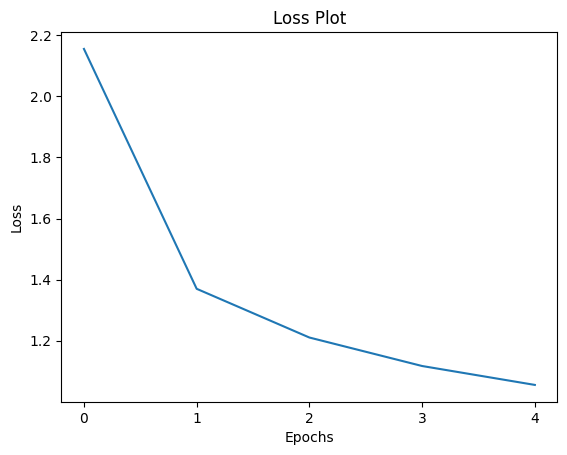

In [ ]:
plt.plot(loss_plot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.xticks(range(0, len(loss_plot)))
plt.show()

<h3> Добавим еще 10 эпох. Итого 15

In [ ]:
EPOCHS = 10

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy() / int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss / num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec\n')

Epoch 1 Batch 0 Loss 0.9689
Epoch 1 Loss 1.011111
Time taken for 1 epoch 67.57 sec

Epoch 2 Batch 0 Loss 0.8315
Epoch 2 Loss 0.975857
Time taken for 1 epoch 66.34 sec

Epoch 3 Batch 0 Loss 1.0507
Epoch 3 Loss 0.944577
Time taken for 1 epoch 66.65 sec

Epoch 4 Batch 0 Loss 1.0354
Epoch 4 Loss 0.914249
Time taken for 1 epoch 66.70 sec

Epoch 5 Batch 0 Loss 0.8720
Epoch 5 Loss 0.885747
Time taken for 1 epoch 66.77 sec

Epoch 6 Batch 0 Loss 0.9010
Epoch 6 Loss 0.862243
Time taken for 1 epoch 67.87 sec

Epoch 7 Batch 0 Loss 0.8399
Epoch 7 Loss 0.839046
Time taken for 1 epoch 66.80 sec

Epoch 8 Batch 0 Loss 0.8168
Epoch 8 Loss 0.814183
Time taken for 1 epoch 66.75 sec

Epoch 9 Batch 0 Loss 0.7715
Epoch 9 Loss 0.785966
Time taken for 1 epoch 66.76 sec

Epoch 10 Batch 0 Loss 0.7649
Epoch 10 Loss 0.761603
Time taken for 1 epoch 66.75 sec



Графики после 15 эпох обучения

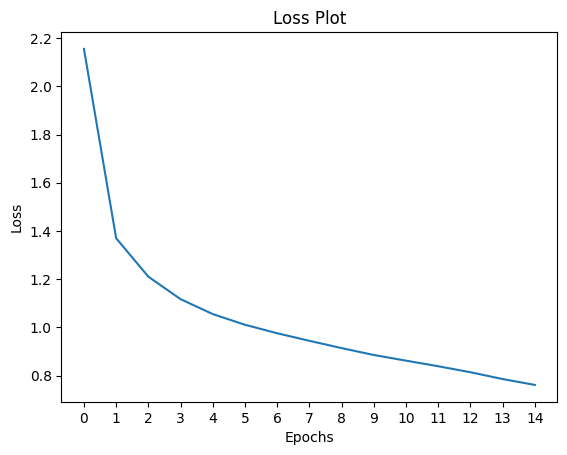

In [ ]:
plt.plot(loss_plot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.xticks(range(0, len(loss_plot)))
plt.show()

In [ ]:
EPOCHS = 5

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy() / int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')

    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss / num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec\n')

Epoch 1 Batch 0 Loss 0.5332
Epoch 1 Loss 0.736289
Time taken for 1 epoch 67.37 sec

Epoch 2 Batch 0 Loss 0.7078
Epoch 2 Loss 0.711369
Time taken for 1 epoch 66.84 sec

Epoch 3 Batch 0 Loss 0.6371
Epoch 3 Loss 0.682435
Time taken for 1 epoch 66.66 sec

Epoch 4 Batch 0 Loss 0.6375
Epoch 4 Loss 0.653963
Time taken for 1 epoch 67.11 sec

Epoch 5 Batch 0 Loss 0.4836
Epoch 5 Loss 0.625232
Time taken for 1 epoch 67.16 sec



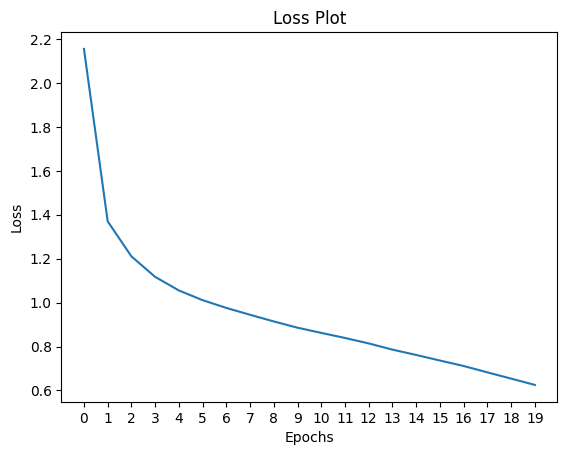

In [ ]:
plt.plot(loss_plot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.xticks(range(0, len(loss_plot)))
plt.show()

<h2> Подпись

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)

        if predicted_word == '':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [ ]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(200, 200))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (80, 80))
        grid_size = max(int(np.ceil(len_result/2)), 1)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    # plt.tight_layout()
    plt.show()

In [ ]:
!pip install rouge-score bert-score -q

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score

chencherry = SmoothingFunction()

rid 162
BLEU-1 score: 0.11661968501870064
BLEU-2 score: 0.08486981867996472
BLEU-3 score: 0.06349294900682423
BLEU-4 score: 0.04506964127165119
ROUGE-1 score: 0.7241379310344828
ROUGE-L score: 0.6206896551724138
Real report:  indications dyspnea findings cardiomediastinal silhouette and pulmonary vasculature are within normal limits lungs are clear no pneumothora or pleural effusion no acute osseous findings impressions no acute cardiopulmonary findings
Predicted report:  indications male vehicle accident findings cardiac and mediastinal contours are within normal limits in size and contour there is no evidence of pneumothora or pleural effusion cervical spine included osseous structures are intact impressions no acute cardiopulmonary abnormality of breast cancer with chest pain findings heart size is normal for contour are normal with mild degenerative joint disease of the right anterior th rib mass on the interval fiation of thoracic spine lymphadenopathy ct of chronic nonproductive 

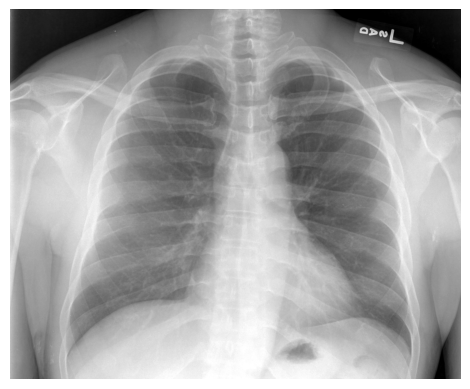

In [ ]:
rid = np.random.randint(0, len(img_name_val))
print('rid', rid)

image = img_name_val[rid]
img = plt.imread(image)

plt.figure()
plt.imshow(img, cmap = "gray")
plt.axis(False)

real_caption = [tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]]

result, attention_plot = evaluate(image)
rem = ['startseq', 'start', 'end', 'endseq']

real_caption  = [x for x in real_caption if x not in rem]
result = [x for x in result if x not in rem]

weights = [(1, 0, 0, 0),   # BLEU-1
           (0.5, 0.5, 0, 0), # BLEU-2
           (0.33, 0.33, 0.33, 0), # BLEU-3
           (0.25, 0.25, 0.25, 0.25)] # BLEU-4

bleu_scores = []
for weight in weights:
    bl = sentence_bleu([result], real_caption, weights=weight, smoothing_function=SmoothingFunction().method5)
    bleu_scores.append(bl)

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_scores = scorer.score(' '.join(result), ' '.join(real_caption))

for i, score in enumerate(bleu_scores, start=1):
    print(f"BLEU-{i} score:", score)
print("ROUGE-1 score:", rouge_scores['rouge1'].precision)
print("ROUGE-L score:", rouge_scores['rougeL'].precision)
print('Real report: ', ' '.join([i for i in real_caption]))
print('Predicted report: ', ' '.join(result))


<h2>Расчет качества модели

In [ ]:
# BLEU 1-4

index = len(img_name_val)
cols = ['image', 'real', 'pred', 'bleu_1', 'bleu_2', 'bleu_3', 'bleu_4', 'rouge_1', 'rouge_l']
dat = pd.DataFrame(columns=cols)

# Инициализируем переменные для суммирования метрик
bleu_scores = [0] * len(weights)

# Создаем список весов для BLEU-1 до BLEU-4
weights = [
    (1, 0, 0, 0),    # BLEU-1
    (0.5, 0.5, 0, 0),  # BLEU-2
    (0.33, 0.33, 0.33, 0),  # BLEU-3
    (0.25, 0.25, 0.25, 0.25)  # BLEU-4
]

rouge_1 = 0
rouge_l = 0
bleu_1_scores = []
bleu_2_scores = []
bleu_3_scores = []
bleu_4_scores = []

nums = 50

dfs = []

for j in range(nums):
    image = img_name_val[j]

    real_caption = [tf.compat.as_text(index_to_word(i).numpy())
                            for i in cap_val[j] if i not in [0]]

    result, attention_plot = evaluate(image)

    # removing the start and end tags we initially added
    rem = ['startseq', 'start', 'end', 'endseq']

    real_caption  = [x for x in real_caption if x not in rem]
    result  = [x for x in result if x not in rem]

    print(f'Real report: {" ".join([i for i in real_caption])}')
    print(f'Predicted report: {" ".join(result)}')

    chencherry = SmoothingFunction()
    bleu_scores = [0] * len(weights)

    for i, weight in enumerate(weights):
        bleu_scores[i] = sentence_bleu([result], real_caption, weights=weight,
                                       smoothing_function=chencherry.method5)
    bleu_1_scores.append(bleu_scores[0])
    bleu_2_scores.append(bleu_scores[1])
    bleu_3_scores.append(bleu_scores[2])
    bleu_4_scores.append(bleu_scores[3])

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(' '.join(result), ' '.join(real_caption))
    rouge_1 += rouge_scores['rouge1'].precision
    rouge_l += rouge_scores['rougeL'].precision

    real_cap =  ' '.join([i for i in real_caption])
    pred_cap = ' '.join(result)

    temp_df = pd.DataFrame({'image': [image],
                            'real': [real_cap],
                            'pred': [pred_cap],
                            'bleu_1': [bleu_scores[0]],
                            'bleu_2': [bleu_scores[1]],
                            'bleu_3': [bleu_scores[2]],
                            'bleu_4': [bleu_scores[3]],
                            'rouge_1': [rouge_scores['rouge1'].precision],
                            'rouge_l': [rouge_scores['rougeL'].precision]})

    dfs.append(temp_df)

    print('BLEU_1 score:', bleu_scores[0])
    print('BLEU_2 score:', bleu_scores[1])
    print('BLEU_3 score:', bleu_scores[2])
    print('BLEU_4 score:', bleu_scores[3])
    print("ROUGE-1 score:", rouge_scores['rouge1'].precision)
    print("ROUGE-L score:", rouge_scores['rougeL'].precision)

    print(f"{'*' * 100}")

average_bleu_1 = sum(bleu_1_scores) / nums
average_bleu_2 = sum(bleu_2_scores) / nums
average_bleu_3 = sum(bleu_3_scores) / nums
average_bleu_4 = sum(bleu_4_scores) / nums

# Вывод средних значений метрик BLEU
print(f"Average BLEU-1 score on the test data is {average_bleu_1}")
print(f"Average BLEU-2 score on the test data is {average_bleu_2}")
print(f"Average BLEU-3 score on the test data is {average_bleu_3}")
print(f"Average BLEU-4 score on the test data is {average_bleu_4}")
print(f"Average rouge_1 score on the test data is {rouge_1 / nums}")
print(f"Average rouge_l score on the test data is {rouge_l / nums}")

dat = pd.concat(dfs, ignore_index=True)

# Сохраняем DataFrame в файл CSV
dat.to_csv('/content/drive/MyDrive/shikha version/data/real_vs_predicted.csv', index=False)

Real report: indications male with pneumonia findings heart size within normal limits there is focal left lateral base airspace disease there is a mm nodular opacity in the right midlung no pneumothora no pleural effusion no displaced rib fractures there is an apparent deformity of the right humeral surgical neck this is not seen on the comparison correlate clinically with history of fracture impressions left base airspace disease and nodular opacity in the right midlung
Predicted report: indications syncopal episode findings the trachea is midline negative for pneumothora pleural effusion or focal airspace consolidation heart size and pulmonary vascularity are within normal limits impressions no acute cardiopulmonary abnormality of lung cancer no months findings the heart size and mediastinal contour are within normal limits the lungs are clear impressions negative for adenopathy no acute osseous abnormality bilateral pulmonary arteries changes of retained contrast at hours findings h

In [ ]:
# index = len(img_name_val)
# cols = ['image', 'real', 'pred', 'bleu', 'rouge_1', 'rouge_l']
# dat = pd.DataFrame(columns=cols)

# bl = 0
# rouge_1 = 0
# rouge_l = 0

# df_predicted_res = pd.DataFrame()

# nums = 50

# for j in range(nums):
#     image = img_name_val[j]

#     real_caption = [tf.compat.as_text(index_to_word(i).numpy())
#                             for i in cap_val[j] if i not in [0]]

#     result, attention_plot = evaluate(image)

#     # removing the start and end tags we initially added
#     rem = ['startseq', 'start', 'end', 'endseq']

#     real_caption  = [x for x in real_caption if x not in rem]
#     result  = [x for x in result if x not in rem]

#     print('Real report: ', ' '.join([i for i in real_caption]))
#     print('Predicted report: ', ' '.join(result))

#     chencherry = SmoothingFunction()
#     bl += sentence_bleu([result], real_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method5)
#     scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
#     rouge_scores = scorer.score(' '.join(result), ' '.join(real_caption))
#     rouge_1 += rouge_scores['rouge1'].precision
#     rouge_l += rouge_scores['rougeL'].precision

#     print('Bleu score: ', sentence_bleu([result], real_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method5))
#     print("ROUGE-1 score:", rouge_scores['rouge1'].precision)
#     print("ROUGE-L score:", rouge_scores['rougeL'].precision)

#     real_cap =  ' '.join([i for i in real_caption])
#     pred_cap = ' '.join(result)
#     dat = dat.append({'image': image,
#                       'real': real_cap,
#                       'pred': pred_cap,
#                       'bleu': sentence_bleu([result], real_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method5),
#                       'rouge_1': rouge_scores['rouge1'].precision,
#                       'rouge_l': rouge_scores['rougeL'].precision}, ignore_index=True)
#     print('*' * 100)

# print("Average bleu score on the test data is ", bl / nums)
# print("Average rouge_1 score on the test data is ", rouge_1 / nums)
# print("Average rouge_l score on the test data is ", rouge_l / nums)

# dat.to_csv('/content/drive/MyDrive/shikha version/data/real_vs_predicted.csv')


In [ ]:
prediction = pd.read_csv('/content/drive/MyDrive/shikha version/data/real_vs_predicted.csv')
prediction

,image,real,pred,bleu_1,bleu_2,bleu_3,bleu_4,rouge_1,rouge_l
0,/content/images/images_normalized/1855_IM-0555...,indications male with pneumonia findings heart...,indications syncopal episode findings the trac...,0.490277,0.305438,0.190763,0.112036,0.356164,0.191781
1,/content/images/images_normalized/119_IM-0128-...,indications right arm numbness rightsided ches...,indications female with and smoking and findin...,0.358128,0.223685,0.140825,0.083065,0.383333,0.233333
2,/content/images/images_normalized/2417_IM-0961...,indications chest pain findings stable cardiom...,indications male with chest pain nonproductive...,0.104533,0.066191,0.039963,0.023106,0.419355,0.387097
3,/content/images/images_normalized/443_IM-2078-...,indications positive ppd findings heart size a...,indications loss of transmetatarsal carcinoma ...,0.217261,0.153326,0.109578,0.076143,0.567568,0.324324
4,/content/images/images_normalized/1210_IM-0142...,indications with scheduled hip replacement sur...,indications findings the lungs remain clear de...,0.505940,0.346912,0.236824,0.153672,0.430769,0.230769
5,/content/images/images_normalized/357_IM-1753-...,indications woman with shortness of breath fin...,indications chest pain findings cardiac and me...,0.547278,0.358324,0.241112,0.155734,0.302632,0.223684
6,/content/images/images_normalized/2702_IM-1170...,indications difficulty breathing chest pain fo...,indications pain findings lungs are mildly inc...,0.132282,0.078423,0.046379,0.026490,0.466667,0.333333
7,/content/images/images_normalized/113_IM-0086-...,indications chest pain findings the heart and ...,indications female with chest pain findings ca...,0.307583,0.192469,0.119218,0.069756,0.375000,0.250000
8,/content/images/images_normalized/36_IM-1776-1...,indications female with chest pain rule out pn...,indications diminished breath sounds findings ...,0.319062,0.217502,0.154605,0.108592,0.568182,0.454545
9,/content/images/images_normalized/738_IM-2296-...,indications chest pain findings the heart and ...,indications female dyspnea shortness of breath...,0.058008,0.034499,0.020417,0.011672,0.461538,0.307692
